In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2
from model_equations import *

In [3]:
HCOLOR = '#CC9900'
PCOLOR = '#00CC33'
DOMCOLOR = '#006699'
DIMCOLOR = '#0099CC' #'#000066'

ccbpalette = [PCOLOR, HCOLOR, DOMCOLOR, DIMCOLOR]
ccborder = ['Bp', 'Bh', 'DOM', 'DIM']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hpalette = [ HCOLOR, DOMCOLOR, DIMCOLOR]
horder = [ 'Bh', 'DOM', 'DIM']
ppalette = [ PCOLOR, DOMCOLOR, DIMCOLOR]
porder = [ 'Bp', 'DOM', 'DIM']
sns.color_palette(ccbpalette)

In [4]:
import os
os.listdir()


['.ipynb_checkpoints',
 'debug.xlsx',
 'draft first model run - nmol per ml.ipynb',
 'first model run-Copy1.ipynb',
 'first model run.ipynb',
 'master model notebook.ipynb',
 'model diagram.pptx',
 'model notebook osnat try1.docx',
 'model notebook sep2021 simplified no quota.docx',
 'model notebook sep2021.docx',
 'model_equations.py',
 'model_equations_no_quota.py',
 'model_noquota_cc.ipynb',
 'model_quota_cc.ipynb',
 'model_quota_honly.ipynb',
 'model_quota_ponly.ipynb',
 'prelim bottle.csv',
 'recycle model results 041021.pptx',
 '__pycache__',
 '~$debug.xlsx',
 '~$del notebook sep2021.docx']

In [5]:
refdf = pd.read_csv('prelim bottle.csv')


In [6]:
for c in ['1A3', 'cc 1A3', 'cc mit9312', 'mit9312']:
    refdf[c] = refdf[c] *1e3
refdf.head()

,day,1A3,cc 1A3,cc mit9312,mit9312
0,0.000000,9.297512e+09,4.698967e+09,7.178947e+08,1.032630e+09
1,1.820833,1.469212e+10,4.648133e+09,1.753684e+09,1.641075e+09
2,4.832639,6.030062e+09,2.996029e+09,9.823158e+09,2.853167e+09
3,6.853472,4.987215e+09,2.290707e+09,2.812842e+10,1.576008e+10
4,8.779167,2.867312e+09,1.598094e+09,6.262316e+10,4.113340e+10


In [7]:
print_params()

M_h  = 1.16e-06
M_p  = 1.16e-06
gamma^D_p  = 5.00e-01
gamma^D_h  = 5.00e-01
E^O_p  = 2.31e-06
E^I_p  = 0.00e+00
E^O_h  = 0.00e+00
E^I_h  = 2.31e-06
Qmax_p  = 1.50e-09
Qmin_p  = 7.00e-10
Qmax_h  = 3.14e-08
Qmin_h  = 1.47e-08
KO_p  = 1.10e-01
KI_p  = 1.10e-01
KO_h  = 2.50e-01
KI_h  = 2.50e-01
VmaxO_p  = 0.00e+00
VmaxI_p  = 2.20e-14
VmaxO_h  = 1.69e-13
VmaxI_h  = 1.69e-14
mu_inf_p  = 1.16e-05
mu_inf_h  = 1.74e-05
epsilon  = 1.16e-15
VTmax  = 2.20e-14
KT_h  = 2.50e-01
omega  = 1.00e+00


dBp/dt


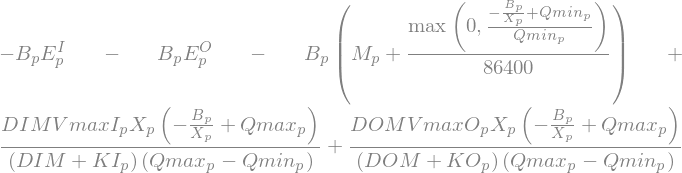

dBh/dt


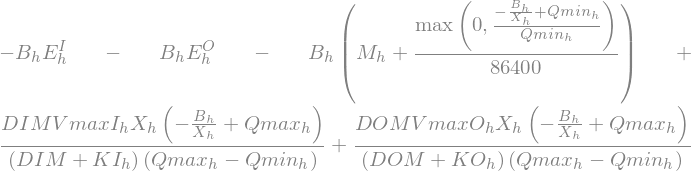

dXp/dt


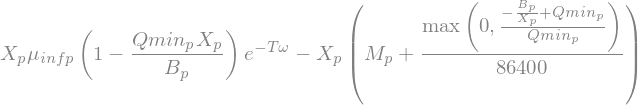

dXh/dt


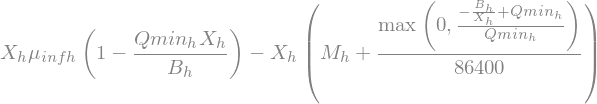

dDOM/dt


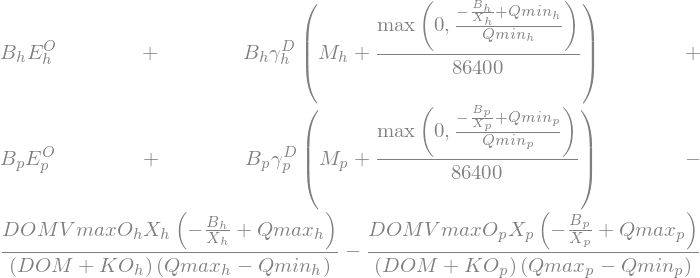

dDIM/dt


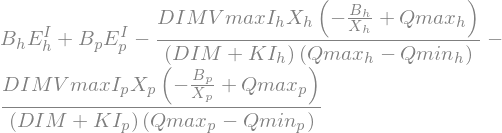

dT/dt


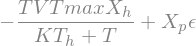

In [8]:
print_equations()


In [9]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_main_data()

In [10]:
print_dydt0(calc_dydt, var_names, init_vars)


dBp/dt = 1.95e-05, init Bp = 7.00e-01, newval = 7.00e-01
dBh/dt = 1.27e-03, init Bh = 1.47e+02, newval = 1.47e+02
dXp/dt = -1.16e+03, init Xp = 1.00e+09, newval = 1.00e+09
dXh/dt = -1.16e+04, init Xh = 1.00e+10, newval = 1.00e+10
dDOM/dt = -1.52e-03, init DOM = 5.00e+00, newval = 5.00e+00
dDIM/dt = 1.49e-04, init DIM = 1.00e+02, newval = 1.00e+02
dT/dt = 1.16e-06, init T = 0.00e+00, newval = 1.16e-06


In [11]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Qh   = 1.47e-08
Qp   = 7.00e-10
Iuptakep = 2.20e-05
Ouptakep = 0.00e+00
Iuptakeh = 1.68e-04
Ouptakeh = 1.61e-03
mup  = 1.16e-10
muh  = 1.74e-11
Mstarp = 1.16e-06
Mstarh = 1.16e-06
growthp = 1.16e-01
growthh = 1.74e-01
deathp = 1.16e+03
deathh = 1.16e+04
exudationOp = 1.62e-06
exudationIp = 0.00e+00
exudationOh = 0.00e+00
exudationIh = 3.39e-04
Treleasep = 1.16e-06
Tbreakdownh = 0.00e+00


In [12]:
biomass_diff0(calc_dydt, init_vars)


dBp/dt + dBh/dt + dDOM/dt + dDIM/dt = -8.523576740349317e-05


In [13]:
sol = run_solver(calc_dydt, init_vars)

solve_ivp(fun=calc_dydt, y0=[0.7000069999999999, 146.5873990732359, 1000000000.0, 10000000000.0, 5, 100, 0],
    t_span=[0, 5356800],
    t_eval=t_eval)
The solver successfully reached the end of the integration interval.


In [14]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [15]:
df.head()

,Bp,Bh,Xp,Xh,DOM,DIM,T,t,day,Qh,...,growthp,growthh,deathp,deathh,exudationOp,exudationIp,exudationOh,exudationIh,Treleasep,Tbreakdownh
0,0.700007,146.587399,1.000000e+09,1.000000e+10,5.000000,100.000000,0.000000,0,0.000000,1.465874e-08,...,0.115740,0.173611,1157.407407,11574.074074,0.000002,0.0,0.0,0.000339,0.000001,0.000000
1,0.927312,147.759353,1.007067e+09,9.889269e+09,0.014219,102.337491,0.001345,14400,0.166667,1.494138e-08,...,2791.266754,3247.968757,1165.587023,11445.912990,0.000002,0.0,0.0,0.000342,0.000001,0.000001
2,1.083716,144.077267,1.039464e+09,9.757093e+09,0.013975,104.639124,0.001405,28800,0.333333,1.476641e-08,...,3947.582237,1235.344986,1203.083315,11292.932093,0.000003,0.0,0.0,0.000334,0.000001,0.000001
3,1.202764,140.535950,1.083837e+09,9.601977e+09,0.014005,106.864214,0.001488,43200,0.500000,1.463615e-08,...,4624.694275,-257.150460,1254.440459,11284.568546,0.000003,0.0,0.0,0.000325,0.000001,0.000001
4,1.302273,137.064917,1.135601e+09,9.424044e+09,0.014770,109.011655,0.001588,57600,0.666667,1.454417e-08,...,5112.460464,-1288.653081,1314.353581,11759.847291,0.000003,0.0,0.0,0.000317,0.000001,0.000001


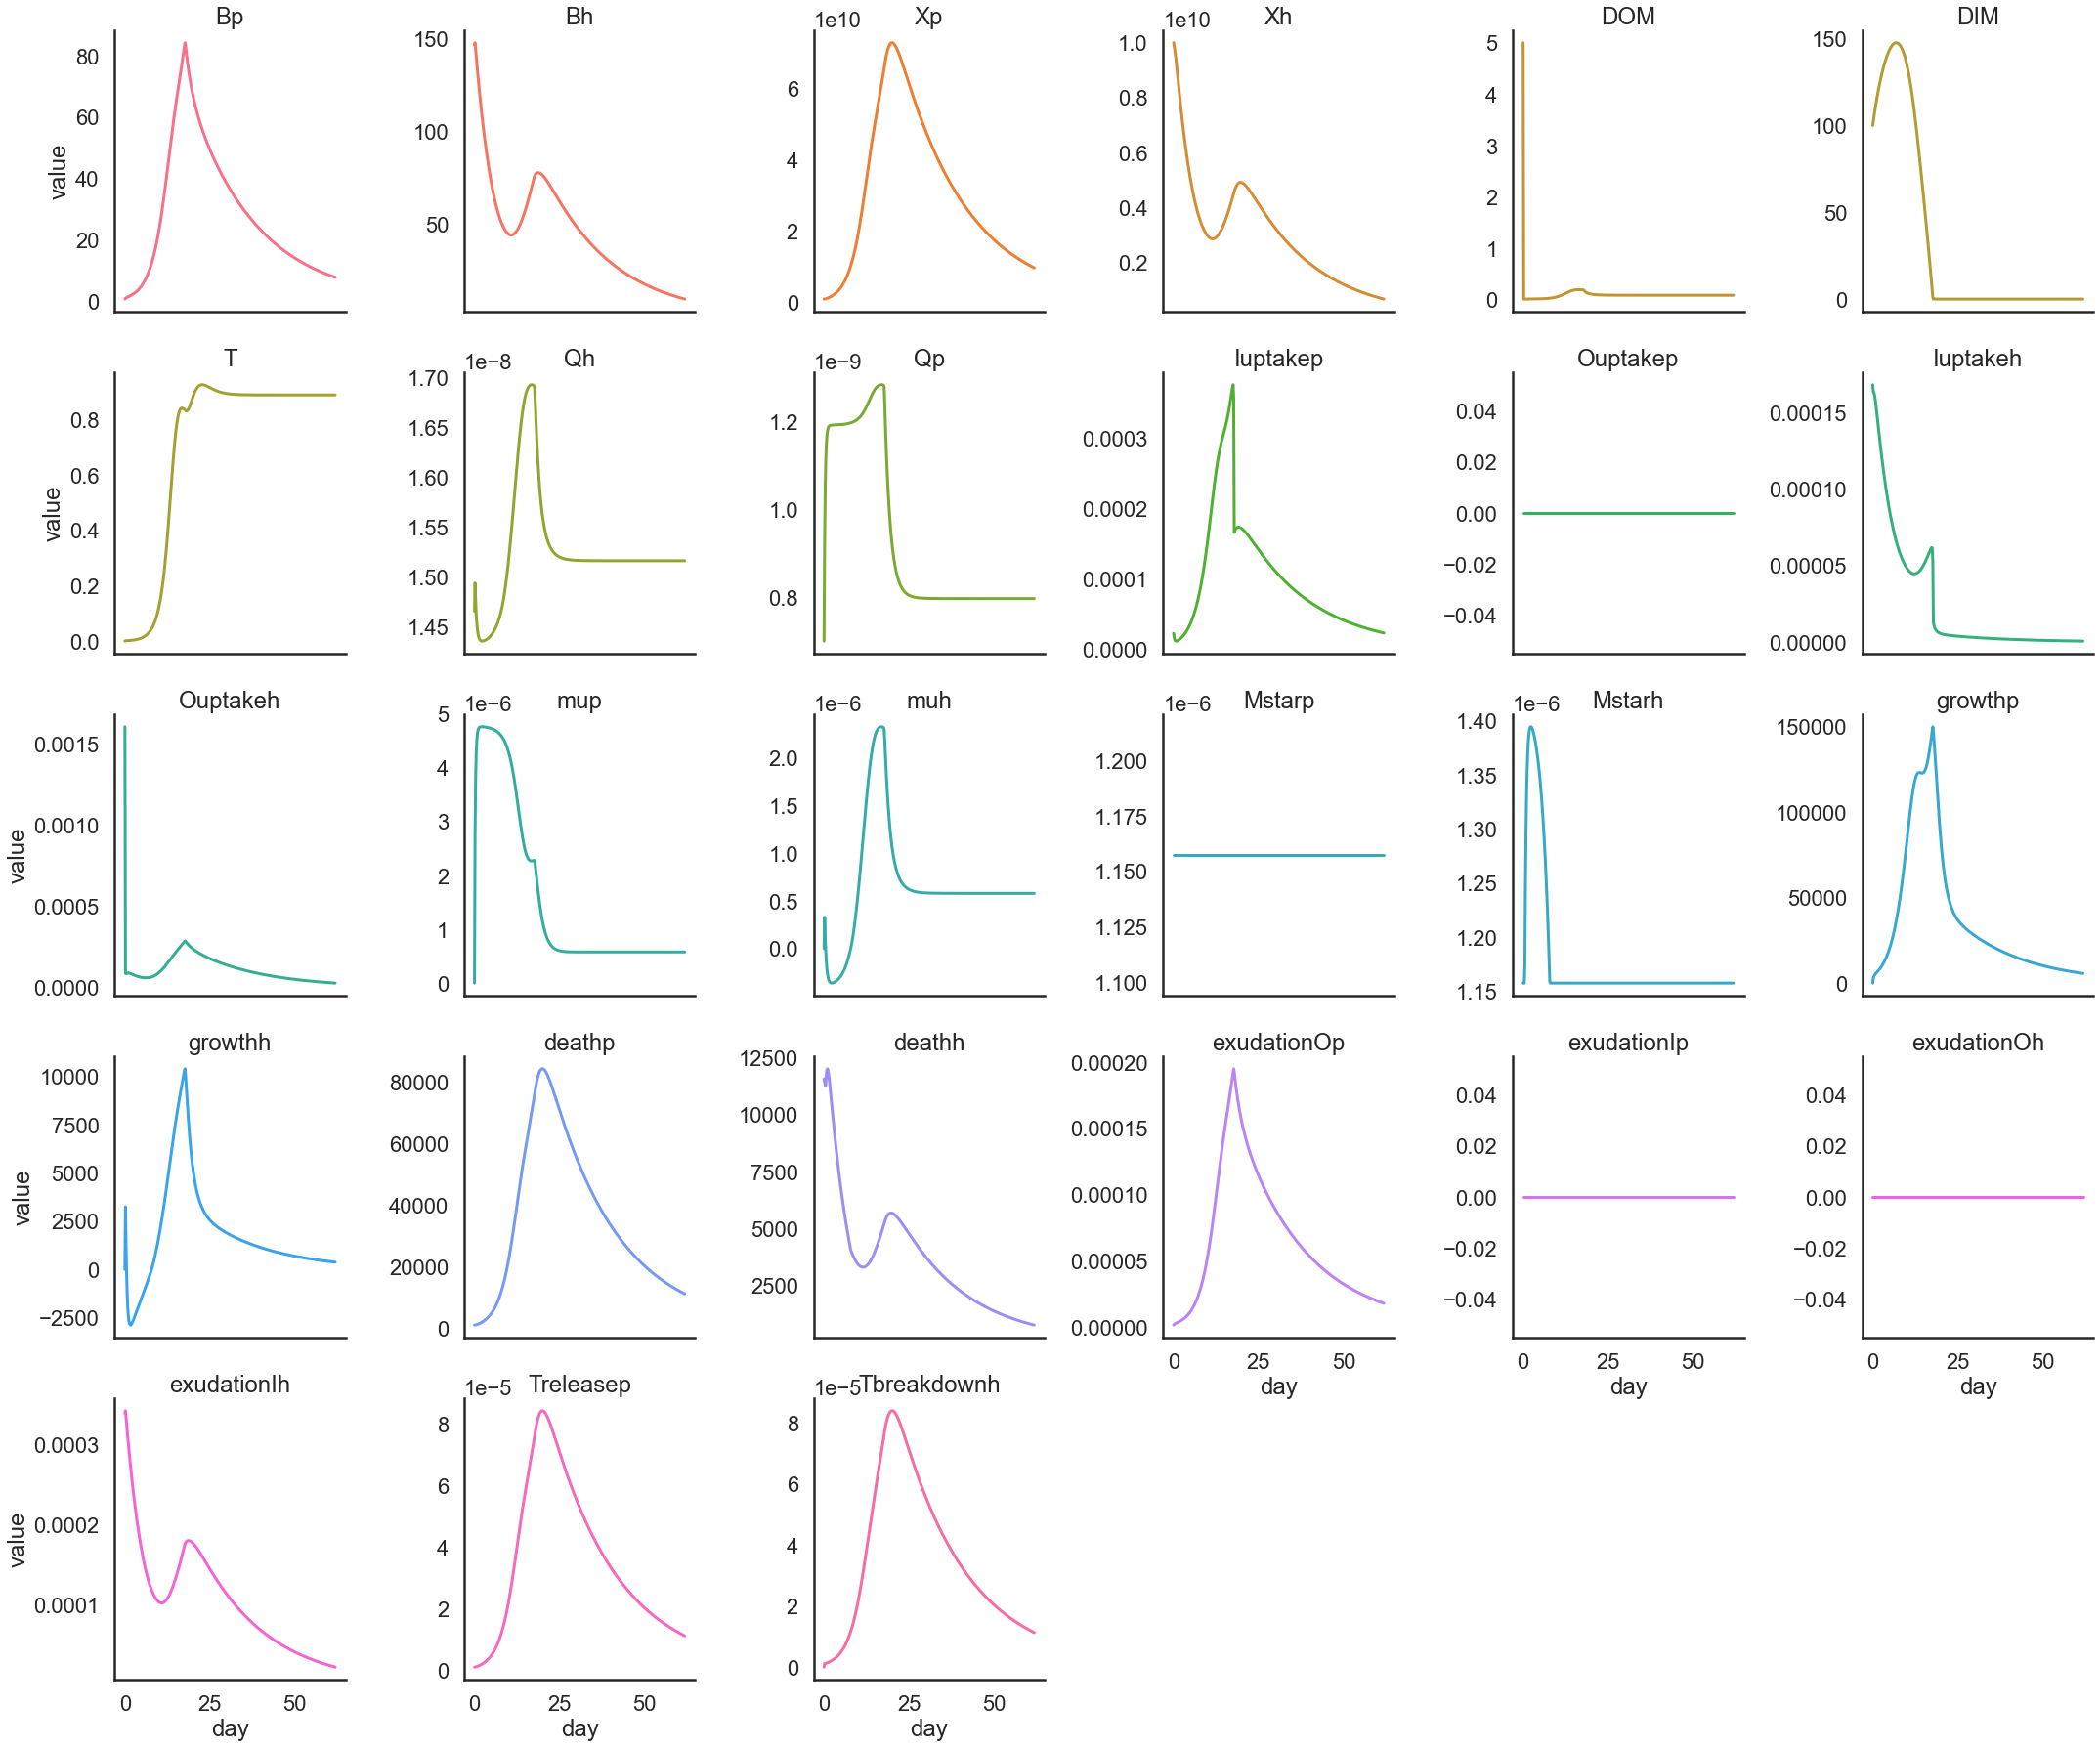

In [16]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [17]:
refdf.columns

Index(['day', '1A3', 'cc 1A3', 'cc mit9312', 'mit9312'], dtype='object')

<AxesSubplot:xlabel='day', ylabel='cells/l'>

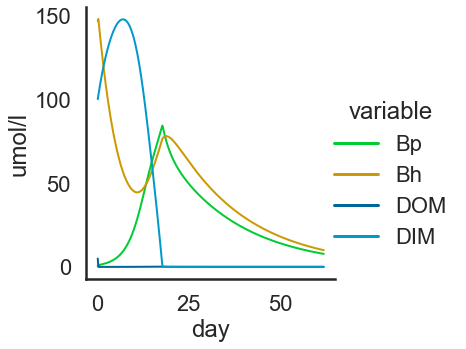

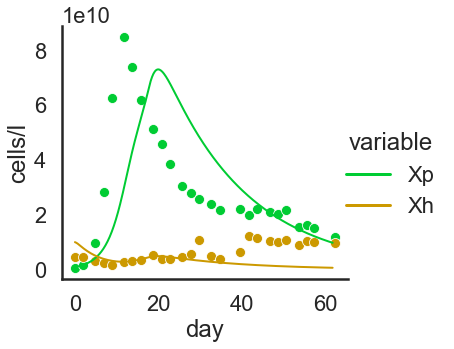

In [18]:
sns.relplot(data=mdf.loc[mdf.variable.isin(['Bp', 'Bh', 'DOM', 'DIM',])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=ccbpalette, hue_order=ccborder,
           ).set(ylabel='umol/l')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=ccxpalette, hue_order=ccxorder,
           ).set(ylabel='cells/l')
sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False, color=HCOLOR)


<AxesSubplot:xlabel='day', ylabel='cells/l'>

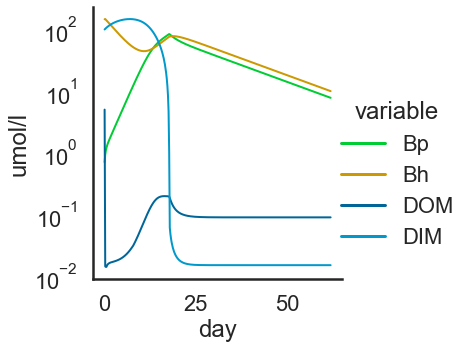

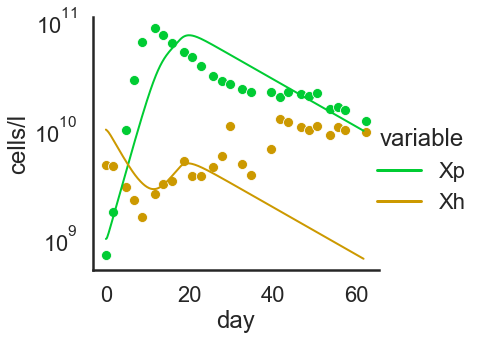

In [19]:
sns.relplot(data=mdf.loc[mdf.variable.isin(['Bp', 'Bh', 'DOM', 'DIM',])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=ccbpalette, hue_order=ccborder,
           ).set(ylabel='umol/l', yscale='log')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=ccxpalette, hue_order=ccxorder,
           ).set(ylabel='cells/l', yscale='log')
sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False,color=HCOLOR)


In [20]:
df.min()

Bp             7.000070e-01
Bh             9.978618e+00
Xp             1.000000e+09
Xh             6.580380e+08
DOM            1.397457e-02
DIM            1.491272e-02
T              0.000000e+00
t              0.000000e+00
day            0.000000e+00
Qh             1.435821e-08
Qp             7.000070e-10
Iuptakep       1.090093e-05
Ouptakep       0.000000e+00
Iuptakeh       6.057060e-07
Ouptakeh       2.826761e-05
mup            1.157396e-10
muh           -3.633636e-07
Mstarp         1.157407e-06
Mstarh         1.157407e-06
growthp        1.157396e-01
growthh       -2.878351e+03
deathp         1.157407e+03
deathh         7.616180e+02
exudationOp    1.620387e-06
exudationIp    0.000000e+00
exudationOh    0.000000e+00
exudationIh    2.309865e-05
Treleasep      1.157407e-06
Tbreakdownh    0.000000e+00
dtype: float64